## classify the Size_Categorie using SVM

- month	month of the year: 'jan' to 'dec'
- day	day of the week: 'mon' to 'sun'
- FFMC	FFMC index from the FWI system: 18.7 to 96.20
- DMC	DMC index from the FWI system: 1.1 to 291.3
- DC	DC index from the FWI system: 7.9 to 860.6
- ISI	ISI index from the FWI system: 0.0 to 56.10
- temp	temperature in Celsius degrees: 2.2 to 33.30
- RH	relative humidity in %: 15.0 to 100
- wind	wind speed in km/h: 0.40 to 9.40
- rain	outside rain in mm/m2 : 0.0 to 6.4
- Size_Categorie 	the burned area of the forest ( Small , Large)

In [220]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
df = pd.read_csv("G:\\Github\\DS-assignments-python\\SVM\\forestfires.csv")
df.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [271]:
df["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

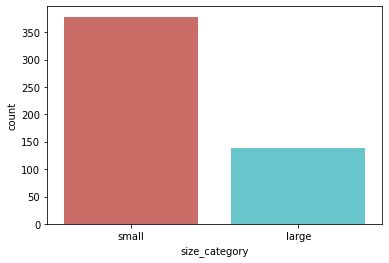

In [223]:
sns.countplot(df["size_category"], palette="hls")

In [224]:
# in the data for month and day already the dummy variables as present ...so we just neeed to drop the categry type ones
df.drop(["month","day"],axis = 1, inplace=True)

In [225]:
# we need convert the output category o.e size to numerical 1 and 0
df.size_category = pd.Series(np.where(df.size_category == "large",1,0),df.index) 

In [226]:
df.nunique()

FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [228]:
df.shape

(517, 29)

In [229]:
dfx = df.copy()

### To reduce collumn redundancy coverting days collumn in number 1 to 7 and month 1 to 12

### Days 

In [230]:
days = df.iloc[:,9:16]
days.head()
days.shape

(517, 7)

In [231]:
days.shape

(517, 7)

In [232]:
day = days.stack()
day

0    dayfri    1
     daymon    0
     daysat    0
     daysun    0
     daythu    0
              ..
516  daysat    0
     daysun    0
     daythu    0
     daytue    1
     daywed    0
Length: 3619, dtype: int64

In [233]:
day_name = pd.Series(pd.Categorical(day[day!=0].index.get_level_values(1)))
day_name[:5]

0    dayfri
1    daytue
2    daysat
3    dayfri
4    daysun
dtype: category
Categories (7, object): ['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed']

In [234]:
df.iloc[:,9:16].head(5)

,dayfri,daymon,daysat,daysun,daythu,daytue,daywed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0


In [235]:
day_no = { 'daymon':1, 'daytue':2, 'daywed':3, 'daythu':4,'dayfri':5,'daysat':6, 'daysun':7}

In [236]:
day_no.values()

dict_values([1, 2, 3, 4, 5, 6, 7])

In [237]:
list(day_no.values())

[1, 2, 3, 4, 5, 6, 7]

In [238]:
day_no_value = day_name.replace(day_no)
day_no_value[:5]

0    5
1    2
2    6
3    5
4    7
dtype: int64

In [239]:
day_no_value = pd.Series(day_no_value)

In [240]:
dfx["day_no"] = day_no_value

In [241]:
#df.iloc[:,9:16].columns.tolist()

In [242]:
dfx.drop(df.iloc[:,9:16].columns.tolist(),axis = 1 ,inplace = True)

In [243]:
dfx.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthapr,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,day_no
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,5
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,2
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,6
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,...,0,0,0,1,0,0,0,0,0,5
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,7


### Months changes

In [244]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   monthapr       517 non-null    int64  
 10  monthaug       517 non-null    int64  
 11  monthdec       517 non-null    int64  
 12  monthfeb       517 non-null    int64  
 13  monthjan       517 non-null    int64  
 14  monthjul       517 non-null    int64  
 15  monthjun       517 non-null    int64  
 16  monthmar       517 non-null    int64  
 17  monthmay       517 non-null    int64  
 18  monthnov  

In [245]:
dfx.iloc[:,9:21].head(5)

,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [246]:
month_no = {"monthjan":1,"monthfeb":2,"monthmar":3,"monthapr":4,"monthmay":5,"monthjun":6,"monthjul":7,"monthaug":8,"monthsep":9,"monthoct":10,"monthnov":11,"monthdec":12}

In [247]:
#dfx.iloc[:,9:21].columns.tolist()

In [248]:
#month_no.keys = dict(zip(dfx.iloc[:,9:21].columns.tolist(),range(12))

In [249]:
month_name = dfx.iloc[:,9:21].stack()
month_name

0    monthapr    0
     monthaug    0
     monthdec    0
     monthfeb    0
     monthjan    0
                ..
516  monthmar    0
     monthmay    0
     monthnov    1
     monthoct    0
     monthsep    0
Length: 6204, dtype: int64

In [250]:
month_name1 = pd.Series(pd.Categorical(month_name[month_name!=0].index.get_level_values(1)))
month_name1

0      monthmar
1      monthoct
2      monthoct
3      monthmar
4      monthmar
         ...   
512    monthaug
513    monthaug
514    monthaug
515    monthaug
516    monthnov
Length: 517, dtype: category
Categories (12, object): ['monthapr', 'monthaug', 'monthdec', 'monthfeb', ..., 'monthmay', 'monthnov', 'monthoct', 'monthsep']

In [251]:
month_no = month_name1.replace(month_no)
month_no

0       3
1      10
2      10
3       3
4       3
       ..
512     8
513     8
514     8
515     8
516    11
Length: 517, dtype: int64

In [252]:
dfx["month_no"] = month_no

In [253]:
dfx.drop(dfx.iloc[:,9:21].columns.tolist(),axis = 1 ,inplace = True)

In [254]:
dfx.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,day_no,month_no
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,5,3
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,2,10
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,6,10
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,5,3
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,7,3


In [255]:
dfx.iloc[:,:]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,day_no,month_no
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,5,3
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,2,10
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,6,10
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,5,3
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,7,8
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,7,8
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,7,8
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,6,8


In [256]:
dfx.drop(["size_category"],axis = 1).head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,day_no,month_no
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,5,3
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,2,10
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,6,10
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,5,3
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,7,3


In [257]:
len(day_name)

517

## Trying different SVMS models

In [258]:
## building the svm model..
X = dfx.drop(["size_category"],axis = 1)
Y = dfx.iloc[:,9]

tr_x,ts_x,tr_y,ts_y = train_test_split( X, Y, test_size = 0.25, random_state = 13)


In [259]:
# linear
m1 = SVC(kernel="linear")
m1.fit(tr_x,tr_y)

pred_tr = m1.predict(tr_x)
pred_ts = m1.predict(ts_x)


In [260]:
# Train accuracy
np.mean(tr_y == pred_tr)
# 100%

1.0

In [261]:
# Test accuracy
np.mean(ts_y == pred_ts)
# 98.46%

0.9923076923076923

In [262]:
# poly
m1 = SVC(kernel="poly")
m1.fit(tr_x,tr_y)

pred_tr = m1.predict(tr_x)
pred_ts = m1.predict(ts_x)

In [263]:
# Train accuracy
np.mean(tr_y == pred_tr)
# 77%

0.7855297157622739

In [264]:
# Test accuracy
np.mean(ts_y == pred_ts)
#76.92%

0.7846153846153846

In [265]:
#RBF
m1 = SVC(kernel="rbf")
m1.fit(tr_x,tr_y)

pred_tr = m1.predict(tr_x)
pred_ts = m1.predict(ts_x)

In [266]:
# Train accuracy
np.mean(tr_y == pred_tr)
# 76.22%

0.7648578811369509

In [267]:
# Test accuracy
np.mean(ts_y == pred_ts)
# 73.84%

0.7384615384615385